# Purpose 
The purpose of this project is to predict IBM customers' churn rates.



# Results

In this test set, 73.4% of the customers do not end up churning. 

Guessing 'no' for every customer would result in an accuracy of 73.4%, but our ML model has an accuracy of 79.4%!

Data set: 

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Import library and data

In [44]:
import pandas as pd
import numpy as np

# Stat
from scipy.stats import chi2_contingency

# ML
from sklearn.metrics import mutual_info_score, accuracy_score, \
                            confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Other
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
df = pd.read_csv('data\\telco_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# drop customerID
df = df.drop(columns = ['customerID'])

# EDA

In [47]:
len(df)

7043

In [48]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

---
The data can be classified into 3 groups:
    

1. Deomographic info:
    * Gender
    * SeniorCitizen
    * Partner
    * Dependents

2. Customer Account Information
    * tenure
    * Contract
    * PaperlessBilling
    * PaymentMethod
    * MonthlyCharges
    * TotalCharges
    
3. Service Information (Whether the client signed up for the service):
    * Phone Service
    * MultipleLines
    * InternetServices
    * OnlineSecurity
    * OnlineBackup
    * DeviceProtection
    * TechSupport
    * StreamingTV
    * StreamingMovies

In [50]:
for column in df.columns:
    # print out unqiue values
    num_uniques = df[column].nunique()
    unique_values = df[column].unique()
    print(f'{column} column has {num_uniques} values: {unique_values}')
    print('\n')

gender column has 2 values: ['Female' 'Male']


SeniorCitizen column has 2 values: [0 1]


Partner column has 2 values: ['Yes' 'No']


Dependents column has 2 values: ['No' 'Yes']


tenure column has 73 values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService column has 2 values: ['No' 'Yes']


MultipleLines column has 3 values: ['No phone service' 'No' 'Yes']


InternetService column has 3 values: ['DSL' 'Fiber optic' 'No']


OnlineSecurity column has 3 values: ['No' 'Yes' 'No internet service']


OnlineBackup column has 3 values: ['Yes' 'No' 'No internet service']


DeviceProtection column has 3 values: ['No' 'Yes' 'No internet service']


TechSupport column has 3 values: ['No' 'Yes' 'No internet service']


StreamingTV column has 3 values: ['No' 'Yes' 'No internet service']


StreamingMovies colu

---
We observe some erroraneous data in the following block. These customers do not have 'TotalCharges' recorded. 

Since we have sufficient data, we can safely remove these few data points.


In [51]:
# Possible erroraneous data
display(df[df['TotalCharges'] == ' '])


# Remove them
df = df[df['TotalCharges'] != ' ']
# Change TotalCharges from str to float 
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:float(x))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [52]:
# We can switch the data from num to cat for EDA, then switch back for ML
one2yes = {0:'No', 1:'Yes'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(one2yes)

In [53]:
# Instead of Yes & No, SeniorCitizen is encoded with 1,0
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


---
We can examine the variables' distribution vs. the target to determine the features' importance.

If the variable have no influence on target variable & have sufficient sample size in each category (i.e. 'Month-to-month' 'One year' 'Two year'), they should share very similar churn rate distribution. 

We will further validate the results in the feature selection section.

## Distribution of Numeric Variables

---
These variables seem to have some influence on the target. Their subsets (Churn vs. No Churn) have different distributions.

In [54]:
df_churn = df[df['Churn'] == 'Yes']
df_no_churn = df[df['Churn'] == 'No']

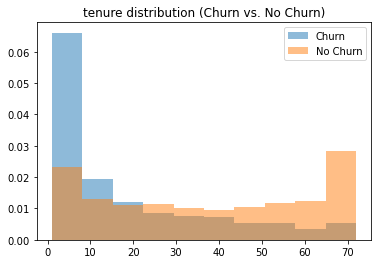

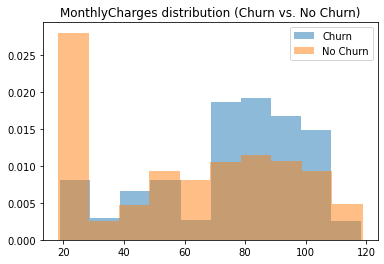

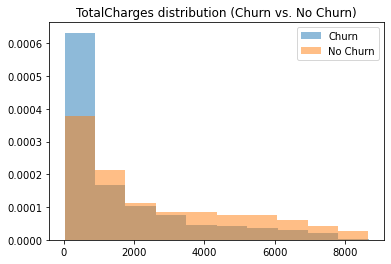

In [55]:
def create_histograms(num_var):
    '''
    Create overlaying histograms of independet variables(split by target)
    '''
    plt.hist(df_churn[num_var], 
             alpha=0.5,
             density = True,
             label='Churn')

    
    plt.hist(df_no_churn[num_var], 
             alpha=0.5,
             density = True,
             label='No Churn')

    plt.legend(loc='upper right')
    plt.title(f'{num_var} distribution (Churn vs. No Churn)')
    plt.show()

    
for num_var in ['tenure' ,'MonthlyCharges' , 'TotalCharges']:
    create_histograms(num_var)

## Distribution of Categorical Variables

---
Gender and phone service seem to not affect churn rate at all. 

MultipleLines is a close call. It seems to affect churn rate a tiny bit if at all

In [56]:
# create df for cat variables
df_cat_var = df.select_dtypes(include=object).drop('Churn', axis=1)

In [57]:
def create_stacked_perc_graph(cat_var):
    '''
    create stacked percentage graph for the independent categorical variables 
    '''
    
    # get percentage df 
    cross_tab_prop = pd.crosstab(index = df_cat_var[cat_var],
                                 columns = df['Churn'],
                                 normalize = "index")

    # show stacked graph
    ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))
    
    
    # show proportions annotations within the bar
    current_x = {}
    for p in ax.patches:
        x_spot = p.get_x()
        if x_spot not in current_x:
            current_x[x_spot] = p.get_height()
        else:
            current_x[x_spot] += p.get_height()
        ax.annotate(str(int(p.get_height()*100))+'%', (p.get_x(), current_x[x_spot] - p.get_height()/2))

        
    
    plt.xlabel(cat_var)
    plt.ylabel('proportions')
    plt.show()

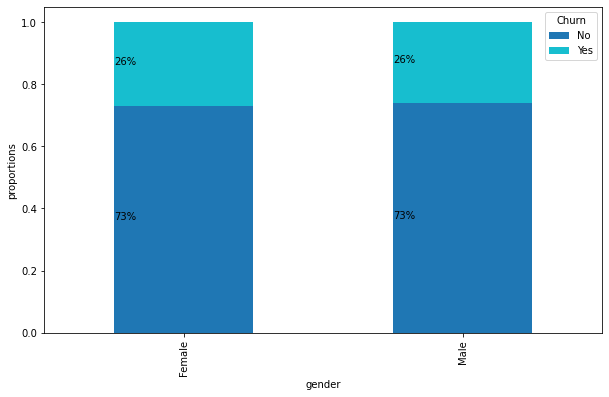

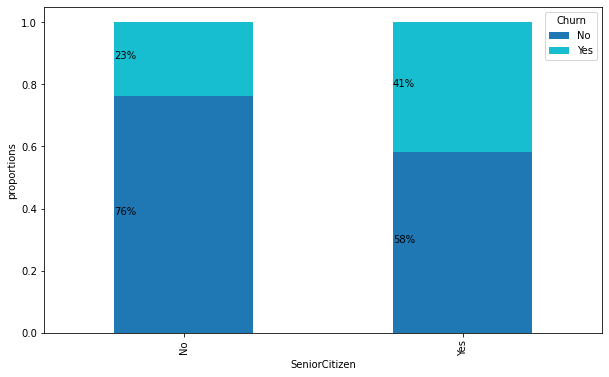

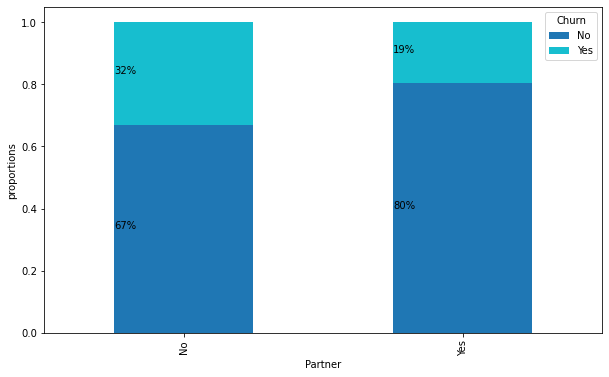

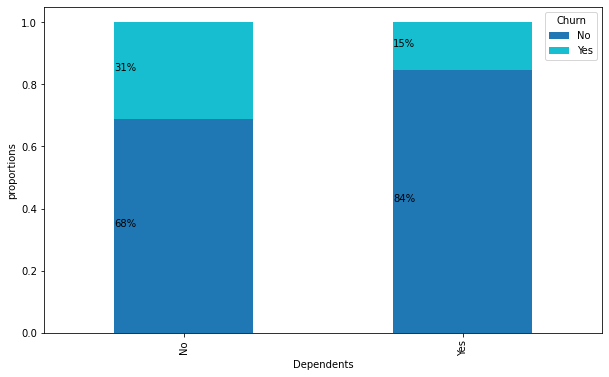

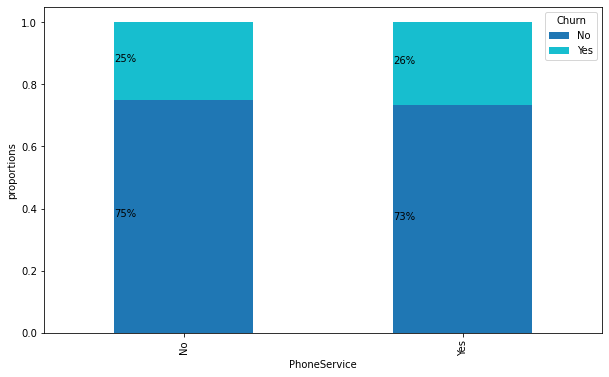

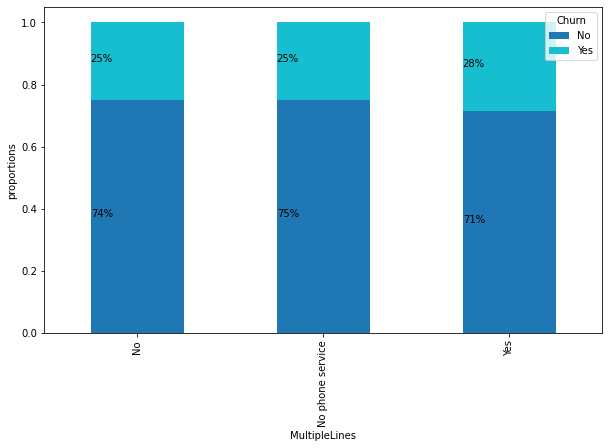

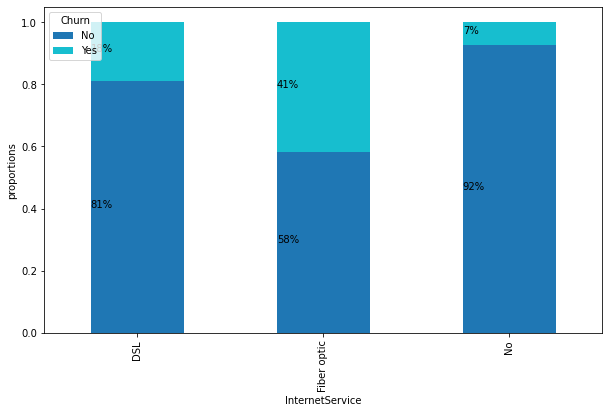

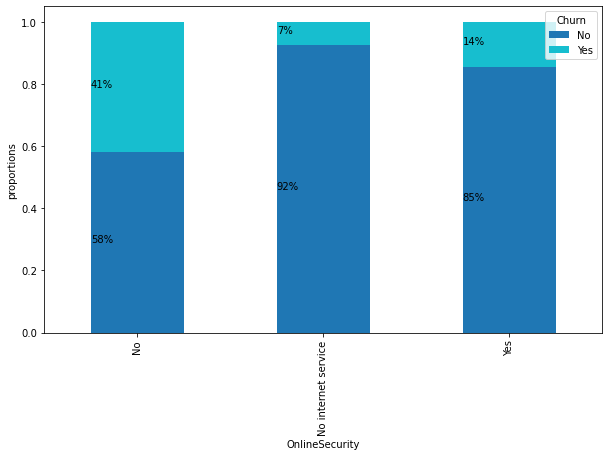

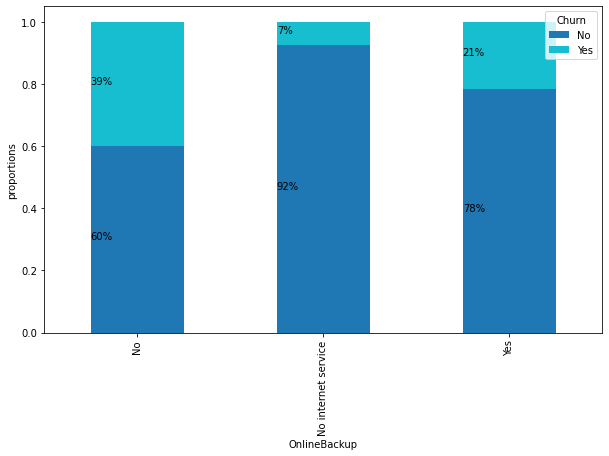

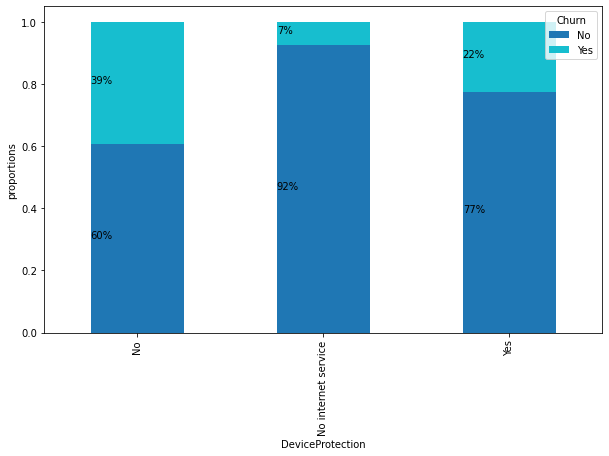

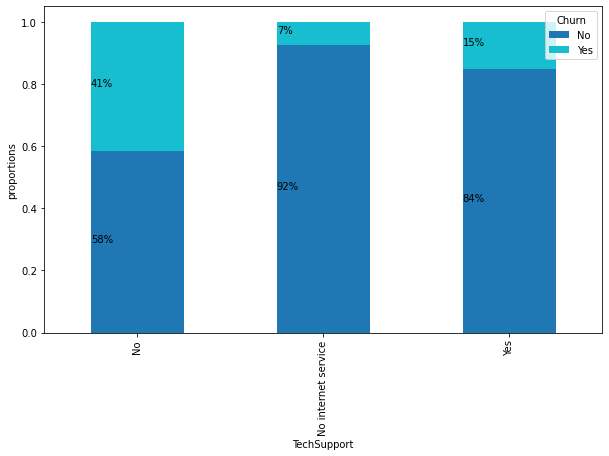

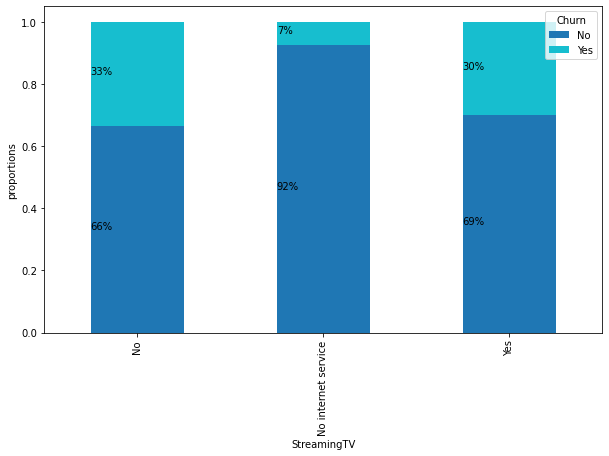

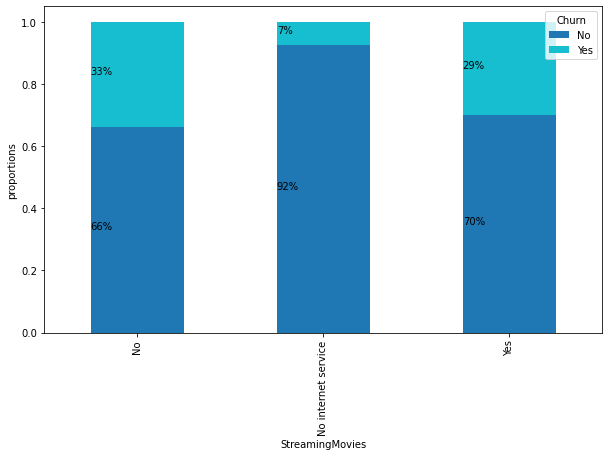

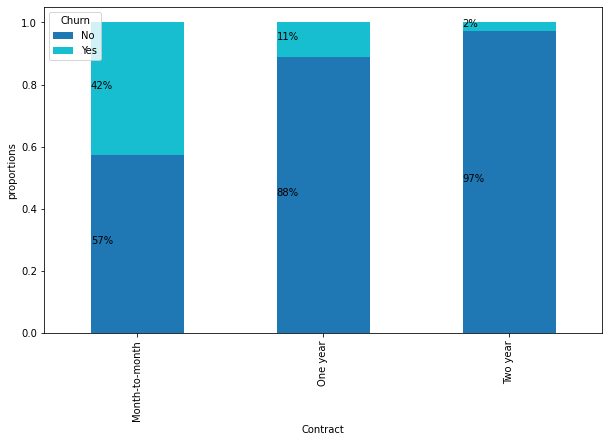

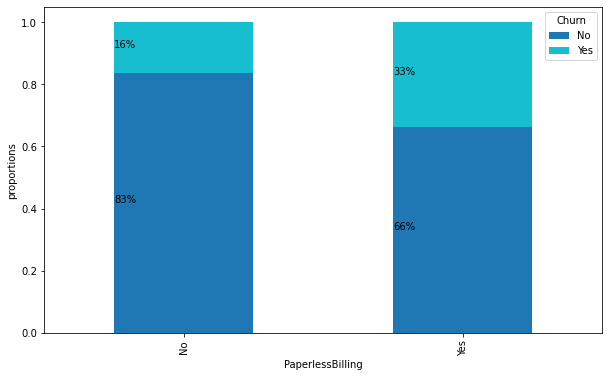

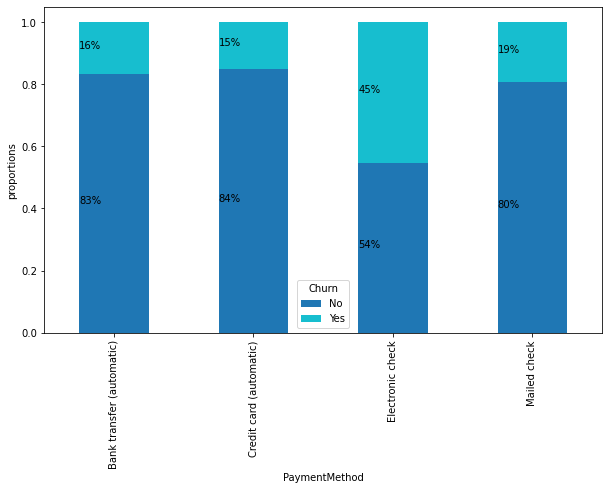

In [58]:
for column in df_cat_var.columns:
    create_stacked_perc_graph(column)

# Feature Selection

There are many ML techniques for selecting variables. 
For example, to find feaure importance btw independent numerical variables vs. target categorical variable, we can use:
1. ANOVA (linear)
2. point biserial correlation (linear)(only if the target is naturally dichotomous)
3. Kendall’s rank coefficient (non-parametric)
4. Predictive Power Score
...etc

To find feature importance btw. independent categorical variable vs. target categorical variable, we can use:
1. Chi-square
2. Mutual Information.
3. Predictive Power Score
...etc

In this project, we will only employ the following:
1. point biserial correlation (for selecting independent numerical variables)
2. Chi-square & Mutual Information (for selecting independent categorical variables)

## point biserial correlation

Longer tenure correlates with higher Churn. 

Higher Monthly Charges correlate with higher Churn. This is expected since no customer would be happy if the company increase the price.

TotalCharges highly correlate with tenure & monthly charges, since total charges = tenure * monthly charges (assuming no price changes)


Since total charges highly correlate with the other two variables, we can drop it. 


In [59]:
# point biserial correlation is mathematically equivalent to the Pearson correlation
df_num_var = df[['tenure','MonthlyCharges','TotalCharges','Churn']].copy()
yes2one = {'Yes':1 , 'No':0}
df_num_var['Churn'] = df_num_var['Churn'].map(yes2one)


# display correlation matrix
df_num_var.corr()

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


## Chi-square

We will drop gender and phone service. These two variables are useless in predicting churn rate.

In [60]:
# create df for chi-squared
df_chi = df.copy().select_dtypes(include=object).drop('Churn', axis=1)

In [61]:
# initialize var to drop
var_drop = {}
var_keep = {}

for column in df_chi.columns:
    
    # run chi^2
    contingency = pd.crosstab(df_chi[column], df['Churn'])
    c, p, dof, expected = chi2_contingency(contingency)

    # show values
    if p > 0.05:
        var_drop[column] = p
    else:
        var_keep[column] = p
        
        
        
# Show variables to drop
print('We can drop these variables')
display(pd.DataFrame(var_drop, ['p_value']).T)


# Show variables to keep
print('\n\nWe need to keep these variables')
df_var_keep = pd.DataFrame(var_keep, ['p_value']).T
df_var_keep = df_var_keep.sort_values(by = 'p_value', ascending = True)
display(df_var_keep)


We can drop these variables


,p_value
gender,0.490488
PhoneService,0.349924




We need to keep these variables


,p_value
Contract,7.326182e-257
OnlineSecurity,1.400687e-184
TechSupport,7.407808e-180
InternetService,5.831199e-159
PaymentMethod,1.426310e-139
OnlineBackup,7.776099e-131
DeviceProtection,1.959389e-121
StreamingMovies,5.353560e-82
StreamingTV,1.324641e-81
PaperlessBilling,8.236203e-58


## Mutual Information

From looking at the MI scores, we would want to pick top n features. 

MultipleLines, PhoneService & gender seem obviously lower than other features. 

This result conflicts with chi-square test results, which only suggest to drop PhoneService & gender. Although chi-square results suggest to keep MultipleLines, its p_value is still much higher than all other variables.

In [62]:
# compute the mutual infomation score
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df['Churn'])


# Show MI score
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
display(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64

## Dropping the features

In [63]:
df = df.drop(columns = ['gender','MultipleLines' , 'PhoneService', 'TotalCharges'])
df.head(2)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,No,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No


# Feature Engineering

In this section, we either create new features or modify existing features

## Label Encoding

---
We shall use label encoding for variables with natural ordering, for ex: existence of X vs non-existence of X.

Thus, we can use label encoding (1,0) for all (Yes, No) variables ..etc

Fun fact, we can actually use label encoding on gender too. Since we can see male vs. female as:
1. male vs. not a male

OR

2. female vs. not a female

In [64]:
# create a copy here, so we can always refer back to df in the future convinently 
df_transformed = df.copy()

In [65]:
label_encoding_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',  'Churn']

for column in label_encoding_columns:
    df_transformed[column] = df_transformed[column].map({'No':0, 'Yes':1})

## One-Hot Encoding

In [66]:
one_hot_encoding_columns = df_transformed.select_dtypes(include=object).columns

In [67]:
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [68]:
df_transformed.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


## Normalization

Let's change all numerical variables' scale to min-max scale (0,1). This ensures we do not give some numerical variables more weight due to their range.

In [69]:
min_max_columns = ['tenure', 'MonthlyCharges']
  
# apply normalization techniques
for column in min_max_columns:
    df_transformed[column] = (df_transformed[column] - df_transformed[column].min()) / (df_transformed[column].max() - df_transformed[column].min())    
  


In [70]:
df_transformed.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,1,0.115423,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,0,0.385075,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


# ML

In [71]:
X = df_transformed.drop(columns = ['Churn'])
y = df['Churn']


# split data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

## Selecting a model / models

Logistic regression and gradident boosting both perform very well. Let's use both.

In [72]:
seed = 42

models = []
models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
models.append(('k_nearest_neighbors', KNeighborsClassifier()))
models.append(('logistic_regression', LogisticRegression(random_state=seed)))
models.append(('support_vector_machines', SVC(random_state=seed)))
models.append(('random_forest', RandomForestClassifier(random_state=seed)))
models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    

In [32]:
accuracy_scores = []
min_accuracy_scores = []
max_accuracy_scores = []
names = []

for name, model in models:
    arr_accuracy_score = cross_val_score(model, X_train, y_train)
    mean_accuracy_score = np.mean(arr_accuracy_score)
    
    
    # including min & max to evulate the variance of the accuracy score
    min_accuracy_score = np.min(arr_accuracy_score)
    max_accuracy_score = np.max(arr_accuracy_score)
    
    
    # append the names
    names.append(name)
    
    #append the accuracy score
    accuracy_scores.append(mean_accuracy_score)
    min_accuracy_scores.append(min_accuracy_score)
    max_accuracy_scores.append(max_accuracy_score)

In [33]:
pd.DataFrame({
    'models' : names,
    'accuracy' : accuracy_scores,
    'min accuracy' : min_accuracy_scores,
    'max accuracy' : max_accuracy_scores
            })

,models,accuracy,min accuracy,max accuracy
0,dummy_classifier,0.734222,0.734222,0.734222
1,k_nearest_neighbors,0.750044,0.739556,0.759111
2,logistic_regression,0.799111,0.782222,0.816889
3,support_vector_machines,0.790933,0.776000,0.817778
4,random_forest,0.776356,0.762667,0.788444
5,gradient_boosting,0.798933,0.786667,0.825778


## Hyperparameters tuning

## Logitistic Regression

In [34]:
model  = LogisticRegression(random_state = 42)

# Create Grid 
grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
     'penalty': ['l2'],
     'C': [100, 10, 1.0, 0.1, 0.01]}


grid_search = GridSearchCV(estimator = model,
                           param_grid = grid, 
                           n_jobs = -1, 
                           cv = 5,  
                           scoring='accuracy',error_score=0)
log_reg_grid_result = grid_search.fit(X_train, y_train)

In [35]:
# See results
print("Best: %f using %s" % (log_reg_grid_result.best_score_, log_reg_grid_result.best_params_))
means = log_reg_grid_result.cv_results_['mean_test_score']
stds = log_reg_grid_result.cv_results_['std_test_score']
params = log_reg_grid_result.cv_results_['params']

print('\n\n')
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800711 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}



0.800711 (0.011971) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800711 (0.011971) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.800711 (0.011971) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.800178 (0.012167) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800178 (0.012167) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.800178 (0.012167) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.799289 (0.013462) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.799111 (0.013655) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.799467 (0.013697) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.796622 (0.014171) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796622 (0.014171) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796267 (0.014326) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.790933 (0.017074) 

In [36]:
# the logistic regression w/ best params after grid search
log_reg = grid_search

## Gradient Boosting

In [37]:
model = GradientBoostingClassifier(random_state = 42)

# Create Grid 
grid = {'n_estimators': [80, 90, 100],
                   'max_depth': [3, 4, 5],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4]}


grid_search = GridSearchCV(estimator = model,
                           param_grid = grid, 
                           n_jobs = -1, 
                           cv = 5,  
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [38]:
# See results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print('\n\n')
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800711 using {'max_depth': 3, 'max_features': None, 'min_samples_split': 3, 'n_estimators': 80}



0.799644 (0.015112) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 80}
0.798933 (0.015482) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 90}
0.798933 (0.013798) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
0.800711 (0.014718) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 3, 'n_estimators': 80}
0.798933 (0.015492) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 3, 'n_estimators': 90}
0.799111 (0.013725) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 3, 'n_estimators': 100}
0.800533 (0.015018) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 80}
0.799111 (0.015064) with: {'max_depth': 3, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 90}
0.798400 (0.014589)

In [39]:
# the gradient boost classifer after grid search 
gradient = grid_search

# Final results

Both models yield similar accuracy, but we shall employ logistic regression since it's easier to interpret.

(This only matters if the project's context requires us to understand the relationship between the independent variables and the target.) 

Let's use logistic regression.

Our ML model (79.4% accuracy) beats the always-no-model (73.4%) by 6%!

In [40]:
y_predict = log_reg.predict(X_test)

accuracy_score( y_test, y_predict)

0.7945984363894811

In [41]:
# The dummy classifier would have gotten a 73.4% accuracy 
# Our ML model beats it by 6%
pd.Series(y_test).value_counts(normalize = True)

No     0.734186
Yes    0.265814
Name: Churn, dtype: float64

In [42]:
confusion_matrix(y_test, y_predict)

array([[913, 120],
       [169, 205]], dtype=int64)

In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.63      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407

